# Credit Card Fraud Detection

In [2]:
# import necessary libraries 
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
from scipy import stats
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder


## Obtain & Load Data

In [3]:

# Read in the data with read_csv() into a Pandas Dataframe
customer_df=pd.read_csv("data/customer.csv")
terminal_df=pd.read_csv("data/terminal.csv")
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")


## Exploratory data analysis

In [4]:
# To visualize the columns names
customer_df.columns

Index(['CUSTOMER_ID', 'x_customer_id', 'y_customer_id', 'mean_amount',
       'std_amount', 'mean_nb_tx_per_day', 'available_terminals',
       'nb_terminals'],
      dtype='object')

In [5]:
# Using .head() function to view the first rows/records of the "customer" dataset 
customer_df.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8


In [6]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUSTOMER_ID          1000 non-null   int64  
 1   x_customer_id        1000 non-null   float64
 2   y_customer_id        1000 non-null   float64
 3   mean_amount          1000 non-null   float64
 4   std_amount           1000 non-null   float64
 5   mean_nb_tx_per_day   1000 non-null   float64
 6   available_terminals  1000 non-null   object 
 7   nb_terminals         1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


In [7]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
customer_df.describe(include='all')

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,975,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,"[20, 56, 266, 568, 682, 783, 794, 1010, 1130, ...",NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
mean,499.500000,51.318204,50.397990,51.550697,25.775348,1.956983,NaN,15.117000
std,288.819436,28.893939,28.785699,28.025746,14.012873,1.165512,NaN,4.255987
min,0.000000,0.007245,0.036734,5.063101,2.531550,0.000295,NaN,2.000000
25%,249.750000,27.099437,26.737835,27.596718,13.798359,0.931062,NaN,12.000000
50%,499.500000,50.601090,49.109879,51.596026,25.798013,1.886714,NaN,15.000000
75%,749.250000,76.422770,76.377724,75.304416,37.652208,2.994755,NaN,18.000000


In [8]:
# Verify which features have missing values
customer_df.isnull().sum()

CUSTOMER_ID            0
x_customer_id          0
y_customer_id          0
mean_amount            0
std_amount             0
mean_nb_tx_per_day     0
available_terminals    0
nb_terminals           0
dtype: int64

In [9]:
# Validating there is not duplicated values
total_duplicates_customer = customer_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_customer)

Total Duplicates: 0


In [10]:
# Using .head() function to view the first rows/records of the "terminal" dataset 
terminal_df.head()

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.702200,72.032449
1,1,0.011437,30.233257
2,2,14.675589,9.233859
3,3,18.626021,34.556073
4,4,39.676747,53.881673


In [11]:
# To visualize the columns names
terminal_df.columns

Index(['TERMINAL_ID', 'x_terminal_id', 'y_terminal_id'], dtype='object')

In [12]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
terminal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TERMINAL_ID    2000 non-null   int64  
 1   x_terminal_id  2000 non-null   float64
 2   y_terminal_id  2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [13]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
terminal_df.describe(include='all')

,TERMINAL_ID,x_terminal_id,y_terminal_id
count,2000.000000,2000.000000,2000.000000
mean,999.500000,49.639290,50.635476
std,577.494589,28.807532,28.817640
min,0.000000,0.011437,0.009695
25%,499.750000,24.795839,25.443403
50%,999.500000,50.340815,51.212018
75%,1499.250000,74.303857,75.550561
max,1999.000000,99.859909,99.987579


In [14]:
# Verify which features have missing values
terminal_df.isnull().sum()

TERMINAL_ID      0
x_terminal_id    0
y_terminal_id    0
dtype: int64

In [15]:
# Validating there is not duplicated values
total_duplicates_terminal = customer_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_terminal)

Total Duplicates: 0


In [16]:
# Using .head() function to view the first rows/records of the "train" dataset 
train_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0


In [17]:
# To visualize the columns names
train_df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_FRAUD'],
      dtype='object')

In [18]:
# Train Data Set has a column TX_FRAUD

In [19]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291231 entries, 0 to 291230
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TRANSACTION_ID  291231 non-null  int64  
 1   TX_DATETIME     291231 non-null  object 
 2   CUSTOMER_ID     291231 non-null  int64  
 3   TERMINAL_ID     291231 non-null  int64  
 4   TX_AMOUNT       291231 non-null  float64
 5   TX_FRAUD        291231 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 13.3+ MB


In [20]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
train_df.describe(include='all')

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
count,291231.000000,291231,291231.000000,291231.000000,291231.000000,291231.000000
unique,NaN,287096,NaN,NaN,NaN,NaN
top,NaN,2021-09-05 10:33:59,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN
mean,204998.000000,NaN,496.256202,993.718526,53.182274,0.022601
std,84071.292461,NaN,285.274966,575.267551,39.573329,0.148627
min,59383.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,132190.500000,NaN,249.000000,496.000000,21.130000,0.000000
50%,204998.000000,NaN,498.000000,1000.000000,44.770000,0.000000
75%,277805.500000,NaN,741.000000,1483.000000,76.850000,0.000000


In [21]:
# Verify which features have missing values
train_df.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
TX_FRAUD          0
dtype: int64

In [22]:
# Validating there is not duplicated values
total_duplicates = train_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 0


In [23]:
# Using .head() function to view the first rows/records of the "test" dataset 
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
0,352590,2022-01-01 00:03:14,208,640,147.24
1,352591,2022-01-01 00:26:39,851,315,13.27
2,352592,2022-01-01 00:30:30,454,27,70.52
3,352593,2022-01-01 00:31:31,677,1573,44.75
4,352594,2022-01-01 00:56:18,322,1398,37.60


In [24]:
# To visualize the columns names
test_df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT'],
      dtype='object')

In [25]:
# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226731 entries, 0 to 226730
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TRANSACTION_ID  226731 non-null  int64  
 1   TX_DATETIME     226731 non-null  object 
 2   CUSTOMER_ID     226731 non-null  int64  
 3   TERMINAL_ID     226731 non-null  int64  
 4   TX_AMOUNT       226731 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.6+ MB


In [26]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
test_df.describe(include='all')

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT
count,226731.000000,226731,226731.000000,226731.000000,226731.000000
unique,NaN,223535,NaN,NaN,NaN
top,NaN,2022-01-27 16:46:20,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN
mean,465955.000000,NaN,496.092255,995.198129,53.229134
std,65451.746279,NaN,285.117396,575.763159,39.569785
min,352590.000000,NaN,0.000000,0.000000,0.000000
25%,409272.500000,NaN,249.000000,495.000000,21.210000
50%,465955.000000,NaN,498.000000,1002.000000,44.830000
75%,522637.500000,NaN,740.000000,1487.000000,76.850000


In [27]:
# Verify which features have missing values
test_df.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
dtype: int64

In [28]:
# Validating there is not duplicated values
total_duplicates_test = test_df.duplicated().sum()
print("Total Duplicates:", total_duplicates_test)

Total Duplicates: 0


In [32]:
# There is not null values or null values the original data set. 
# However we can see data type object in the column "available_terminals" of customer file the same for the "TX_DATETIME" columns in train and test files

In [33]:
#train_df['TX_FRAUD'].value_counts()

## Use visualizations to understand the relationship of the target variable with other features

In [29]:

# Change to catgorical column
train_df['TX_FRAUD'] = train_df['TX_FRAUD'].astype(str)

#Obtain the value counts and print them. We reset the index to make this a bit easier to plot.
fraud_v_counts = train_df['TX_FRAUD'].value_counts().reset_index()
#Rename the columns of this (now) df. 
fraud_v_counts.columns = ['Fraud', 'Value_Count']
#Recode the type, again, for plotting. Here, I will just rename the column values as well.
col_values = ['Not Fraud', 'Is Fraud']
fraud_v_counts['Fraud'] = col_values

print(f"Number of Fraud: {fraud_v_counts['Value_Count'][1]}\nNumber of NOT Fraud: {fraud_v_counts['Value_Count'][0]}")
print(f"The ratio between the two is: " \
f"{fraud_v_counts['Value_Count'][1]/(fraud_v_counts['Value_Count'][1]+fraud_v_counts['Value_Count'][0])} Fraud, " \
f"{fraud_v_counts['Value_Count'][0]/(fraud_v_counts['Value_Count'][1]+fraud_v_counts['Value_Count'][0])} Not Fraud")

Number of Fraud: 6582
Number of NOT Fraud: 284649
The ratio between the two is: 0.022600616005851025 Fraud, 0.9773993839941489 Not Fraud


In [30]:
# Plot the distribution of the target variable (TX_FRAUD) using a histogram

# Utilizing value counts for the categorical column
fig = px.bar(fraud_v_counts, x='Fraud', y='Value_Count', title="Value Counts of Target Variable 'fraud'",
            color='Fraud', color_discrete_map={
                'Not Fraud': '#300085',
                'Is Fraud': '#87CEEB'
            })

# Set the title, font, and axis names
fig.update_layout(
    title_x=0.5,  #Center the title
    font=dict(family="Gill Sans MT", color="black",size=24),
    xaxis_title="",
    yaxis_title="Frequency",
    showlegend=False,
    height=600
)

# Set x-axis tick values
fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Fraud', 'Is Fraud'])
fig.update_traces(marker_line_color='Blue', marker_line_width=2.33)
fig.show()

In [31]:
# We can see that the classes are unbalanced. Showing a significatively difference between the amount of records for Not fraud than Is Fraud.

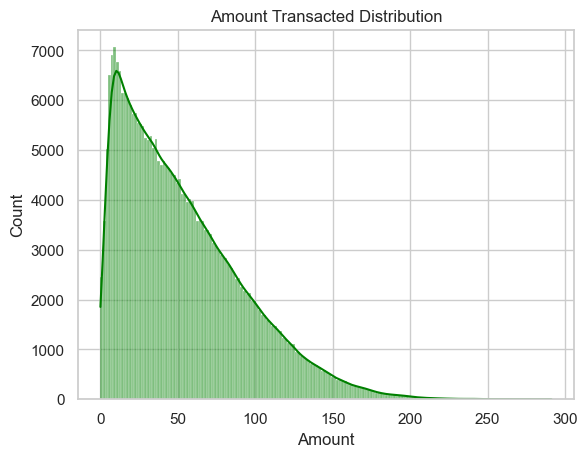

In [32]:
plt.figure()
sns.histplot(data=train_df, x='TX_AMOUNT', kde=True, color='Green')
plt.title('Amount Transacted Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

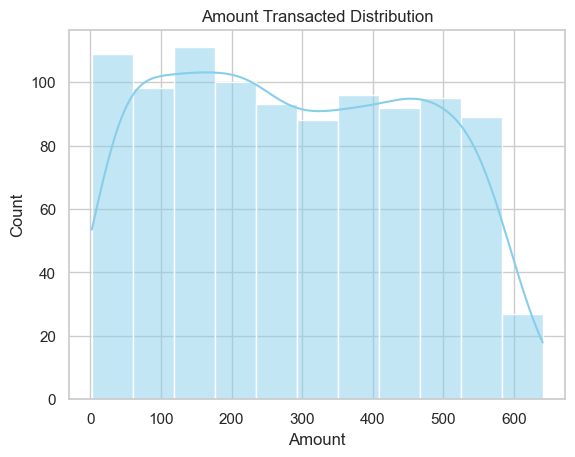

In [33]:
plt.figure()

# Group the DataFrame by the Customer_ID column and count occurrences
transaction_counts = train_df.groupby('CUSTOMER_ID').size()
sns.histplot(data=train_df, x=transaction_counts, kde=True, color='skyblue')
plt.title('Amount Transacted Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

## Prepare & Preprocess Data

In [34]:
# Merge train dataset with customer and terminal datasets to include customer and terminal information relevant to each transaction 
train_df = train_df.merge(customer_df, on='CUSTOMER_ID', how='left')
train_df = train_df.merge(terminal_df, on='TERMINAL_ID', how='left')
train_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,15.172487,63.912685
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,74.196424,98.288079
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,51.950635,6.563484
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,62.417972,26.483666


## Feature Enginering

In [ ]:
# Create features that capture the behavior of transactions, customers, and terminals

In [35]:
# Calculate the distance between customer and terminal
train_df['distance'] = np.sqrt((train_df['x_customer_id'] - train_df['x_terminal_id'])**2 + (train_df['y_customer_id'] - train_df['y_terminal_id'])**2)

# Calculate the deviation of transaction amount from the customer's mean amount
train_df['amount_deviation'] = np.abs(train_df['TX_AMOUNT'] - train_df['mean_amount'])

train_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id,distance,amount_deviation
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252,4.635184,2.753061
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,15.172487,63.912685,3.345987,10.008562
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,74.196424,98.288079,3.452222,18.620413
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,51.950635,6.563484,1.950316,2.867829
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,62.417972,26.483666,4.934747,15.219965


In [38]:
# Using .tail() function to view the last few observations (i.e. records) of the dataset 
train_df.tail()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id,distance,amount_deviation
291226,350609,2021-12-30 23:33:02,221,41,61.26,0,79.559037,34.453046,78.232912,39.116456,2.943576,"[41, 68, 207, 232, 273, 293, 441, 695, 696, 70...",14,75.094243,34.889834,4.486108,16.972912
291227,350610,2021-12-30 23:46:15,101,761,58.80,0,86.948853,45.416240,36.036584,18.018292,0.930977,"[208, 353, 357, 373, 457, 524, 534, 537, 761, ...",17,84.993054,43.465479,2.762357,22.763416
291228,350611,2021-12-30 23:54:38,7,1991,15.08,0,52.184832,41.466194,30.132783,15.066392,3.096935,"[563, 612, 700, 705, 859, 1036, 1231, 1442, 14...",15,51.314901,42.942203,1.713296,15.052783
291229,350612,2021-12-30 23:56:36,161,1166,54.24,0,38.033518,14.780868,70.068772,35.034386,2.627048,"[37, 325, 408, 440, 598, 655, 724, 806, 1034, ...",14,38.411423,14.674793,0.392509,15.828772
291230,350613,2021-12-30 23:58:21,618,1549,6.62,0,96.673774,53.470817,7.338380,3.669190,2.479088,"[16, 100, 183, 549, 698, 747, 989, 1129, 1250,...",21,95.601958,56.461010,3.176482,0.718380


In [37]:
# Validating data on new training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291231 entries, 0 to 291230
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TRANSACTION_ID       291231 non-null  int64  
 1   TX_DATETIME          291231 non-null  object 
 2   CUSTOMER_ID          291231 non-null  int64  
 3   TERMINAL_ID          291231 non-null  int64  
 4   TX_AMOUNT            291231 non-null  float64
 5   TX_FRAUD             291231 non-null  object 
 6   x_customer_id        291231 non-null  float64
 7   y_customer_id        291231 non-null  float64
 8   mean_amount          291231 non-null  float64
 9   std_amount           291231 non-null  float64
 10  mean_nb_tx_per_day   291231 non-null  float64
 11  available_terminals  291231 non-null  object 
 12  nb_terminals         291231 non-null  int64  
 13  x_terminal_id        291231 non-null  float64
 14  y_terminal_id        291231 non-null  float64
 15  distance         

In [ ]:
''' 
# checking methods to balance classes

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
'''